In [27]:
from sonoma_dates import epochNums, epochDates, epochDays
import pandas as pd
import seaborn as sns
import numpy as np

# Load Date Information
- Loads the date time information in sonoma_dates.
- Here we have saved it as a .py file and directly imported the information as python variables

In [28]:
epochNums = [int(x) for x in epochNums[1:-2].split(' ')]
epochDays = [float(x) for x in epochDays[1:-2].split(' ')]

In [29]:
from datetime import datetime 

date_start = "Tue Apr 27 17:10:00 2004"
date_end  = "Fri Jun 11 20:25:00 2004"


def conv_date_from_str(eg_date):
    date_vars = eg_date.split(' ')
    date_vars = [x for x in date_vars if x!=""]

    month_conv = {'Apr':4,
                  'May':5,
                  'Jun':6}

    dow = date_vars[0]
    month = month_conv[date_vars[1]]
    day = date_vars[2]
    time = date_vars[3]
    year = date_vars[4]

    hour = time.split(":")[0]
    minutes = time.split(":")[1]
    seconds = time.split(":")[2]


    # datetime(year, month, day, hour, minute, second, microsecond)
    out_datetime= datetime(int(year), month, int(day), int(hour), int(minutes), int(seconds))
    
    return out_datetime

for dd in epochDates.split('\' \'')[1:-1]:
    conv_date_from_str(dd)
date_middle = [conv_date_from_str(dd) for dd in epochDates.split('\' \'')[1:-1]]

epoch_datetimes = [conv_date_from_str(date_start)] + date_middle + [conv_date_from_str(date_end)]

In [30]:
epoch_data = pd.DataFrame([epochNums, epochDays, epoch_datetimes]).T
epoch_data.columns = ['Epoch_No','Epoch_Days','Epoch_datetime']

In [5]:
epoch_data.head()

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00


In [6]:
#epoch_data.to_csv('data/epoch_data_processed.csv', index=False)

The resulting dataframe epoch_Data tell us three things:
1. Epoch no: The corresponding epoch index which is the same as in the sonoma_log, net and all data
2. Epoch_Days: The time measured in days since some starting
3. Epoch_datetime: The actual  date and time that the measurement was recoreded

In [7]:
sonoma_all = pd.read_csv('Data/sonoma-data-all.csv')
sonoma_all.head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220.0,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223.0,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222.0,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223.0,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222.0,3,97.8044,12.3836,94.4090,4702.70,0.0


In [8]:
epoch_data.head()

,Epoch_No,Epoch_Days,Epoch_datetime
0,1,12536.006944,2004-04-27 17:10:00
1,2,12536.010417,2004-04-27 17:15:00
2,3,12536.013889,2004-04-27 17:20:00
3,4,12536.017361,2004-04-27 17:25:00
4,5,12536.020833,2004-04-27 17:30:00


# Part 2 Data Cleaning

- sonoma_net: Data extracted from network (Cloud?)
- sonoma_log: Data extracted from onboard memory 

In [9]:
sonoma_log = pd.read_csv('Data/sonoma-data-log.csv')
sonoma_net = pd.read_csv('Data/sonoma-data-net.csv')

In [10]:
print(len(sonoma_net))
sonoma_net.head()

114980


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-05-07 18:24:58.666424,2812,119,5,220,2,95.3567,12.6678,92.1444,4218.18,0.0
1,2004-05-07 18:24:58.805974,2812,105,129,223,3,96.9957,12.6482,93.7072,9363.23,0.0
2,2004-05-07 18:24:59.075427,2812,113,118,222,4,94.5031,12.4522,91.2718,9405.41,0.0
3,2004-05-07 18:24:59.355354,2812,138,5,223,2,96.8828,12.6580,93.6018,9363.23,0.0
4,2004-05-07 18:24:59.675467,2812,127,42,222,3,97.8044,12.3836,94.4090,4702.70,0.0


In [11]:
print(len(sonoma_log))
sonoma_log.head()

301056


,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot
0,2004-11-10 14:25:00,3,2,65535,2.88311,255,43.8183,22.4090,43.5236,0.0,0.0
1,2004-11-10 14:25:00,4,2,65535,2.88311,255,44.7798,22.2032,44.4552,0.0,0.0
2,2004-11-10 14:25:00,5,2,65535,2.88311,255,45.7695,22.0660,45.4219,0.0,0.0
3,2004-11-10 14:25:00,6,2,65535,2.88311,255,46.3609,22.0072,46.0020,0.0,0.0
4,2004-11-10 14:25:00,7,2,65535,2.88311,255,46.0326,21.9680,45.6714,0.0,0.0


In [12]:
print("Total Amount of Data: ", len(sonoma_net) + len(sonoma_log))

Total Amount of Data:  416036


We have a total of 416036 datapoints across the sonoma_net and sonoma_log dataset

In [13]:
sonoma_log.columns

Index(['result_time', ' epoch', ' nodeid', ' parent', ' voltage', ' depth',
       ' humidity', ' humid_temp', ' humid_adj', ' hamatop', ' hamabot'],
      dtype='object')

# Part a (and c)

We plot histograms of the variables in sonoma_net and sonoma_log. This highlights two issues.
- The ranges are different across sonoma_net and sonoma_log
- The scales for some variables in sonoma_net and sonoma_log are different from the paper

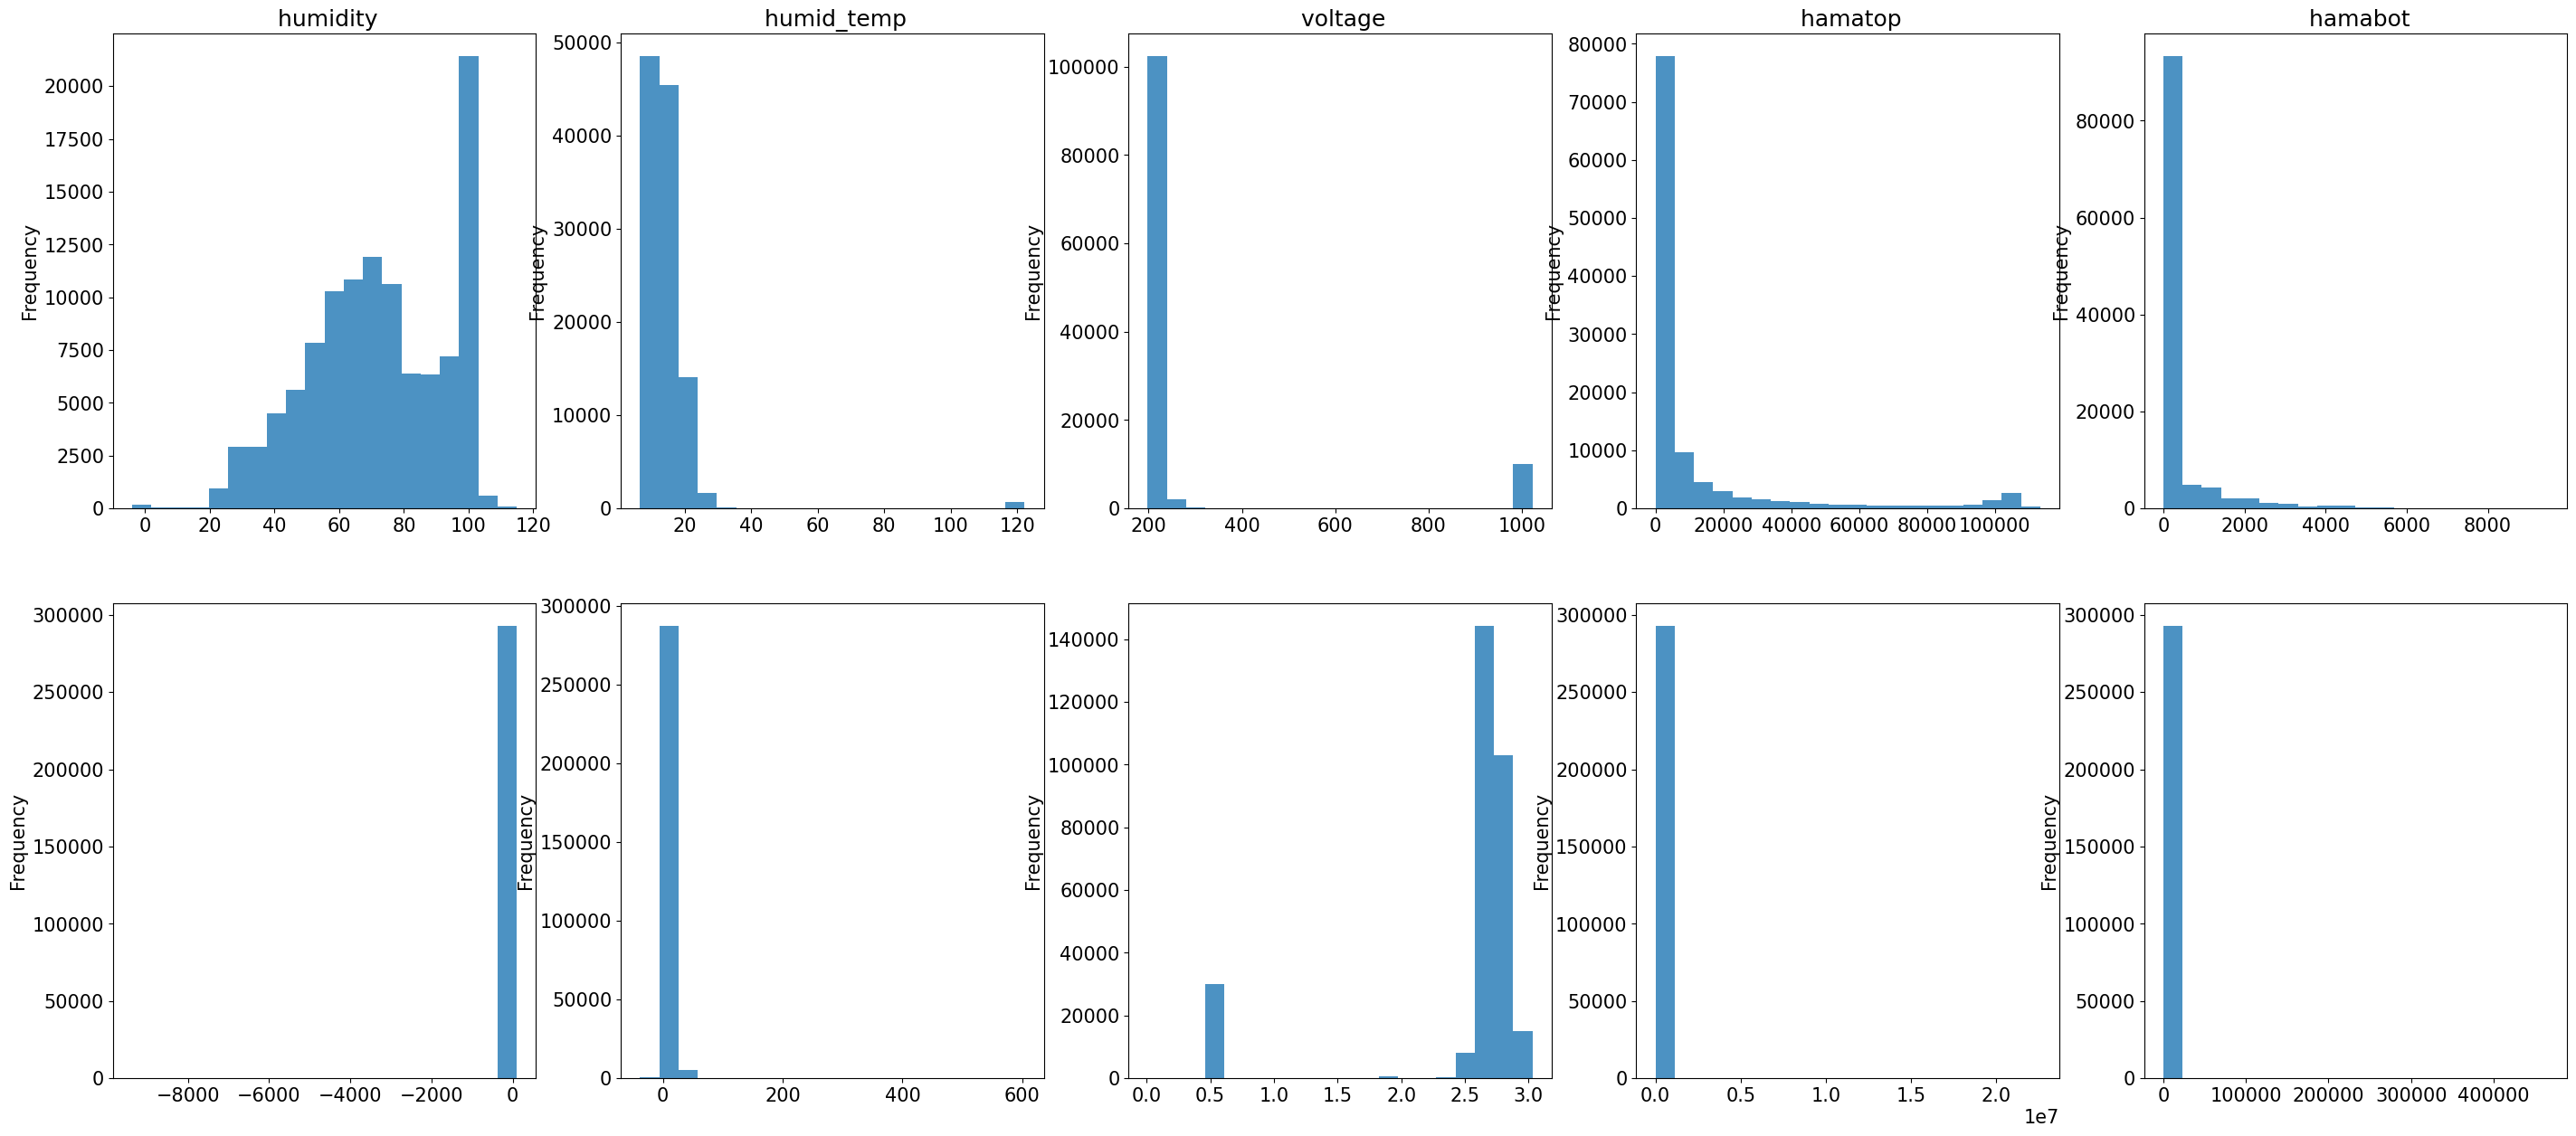

In [14]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', ' voltage', ' hamatop', ' hamabot']

fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)
    

- Looking at raw histogram, we see significant differences in ranges for:
- humidity
- humid_tmep
- humid_adj

In [15]:
sonoma_net[variable_list].describe().loc[['mean','std','25%','75%']].T

,mean,std,25%,75%
humidity,72.123596,21.327203,57.0984,92.6076
humid_temp,14.276954,9.840161,10.1198,16.0880
voltage,292.793190,227.220706,218.0000,227.0000
hamatop,11521.654151,24962.815555,0.0000,8436.3600
hamabot,271.948958,805.305179,0.0000,0.0000


In [16]:
sonoma_net[variable_list].median()

 humidity       72.0543
 humid_temp     12.9814
 voltage       223.0000
 hamatop         0.0000
 hamabot         0.0000
dtype: float64

In [17]:
sonoma_log[variable_list].describe().loc[['mean','std','25%','75%']].T

,mean,std,25%,75%
humidity,61.414470,31.069201,40.02680,80.19970
humid_temp,15.022345,5.685116,10.86460,18.81240
voltage,2.506449,0.646910,2.62796,2.77533
hamatop,10870.344669,48422.142001,0.00000,6762.33000
hamabot,245.535843,1180.337889,0.00000,0.00000


In [18]:
sonoma_log[variable_list].median()

 humidity      61.58290
 humid_temp    14.71600
 voltage        2.69964
 hamatop        0.00000
 hamabot        0.00000
dtype: float64

- Comparing the actual statistics, we can see that the quantiles between both sets are very similar.
- Thus the difference in ranges could be due to outliers in the dataset. 
- These outliers see to be in sonoma_log which generally has more extreme values compared to sonoma_net

- We first convert the ranges of hamatop and hamabot
- To do so we divide by 54 
- We name the resulting columns incident PAR and and reflected PAR respectively to match their names in the paper

### Converting to PAR

In [19]:
sonoma_net['Incident_PAR'] = sonoma_net[' hamatop']/54
sonoma_net['Reflected_PAR'] = sonoma_net[' hamabot']/54

sonoma_log['Incident_PAR'] = sonoma_log[' hamatop']/54
sonoma_log['Reflected_PAR'] = sonoma_log[' hamabot']/54

### Converting to Voltage

Voltage Conversion
- https://learn.sparkfun.com/tutorials/analog-to-digital-conversion/relating-adc-value-to-voltage

- Doesnt work for some reason

<AxesSubplot:>

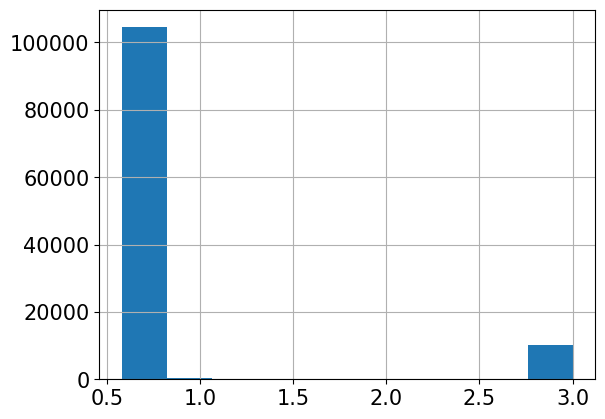

In [20]:
resolution_of_adc = np.max(sonoma_net[' voltage'])
max_voltage = np.max(sonoma_log[' voltage'])

sonoma_net[' voltage'] = sonoma_net[' voltage'].apply(lambda x: x/(resolution_of_adc/3))
sonoma_net[' voltage'].hist()

# Calculate Post Unit Transform Differences

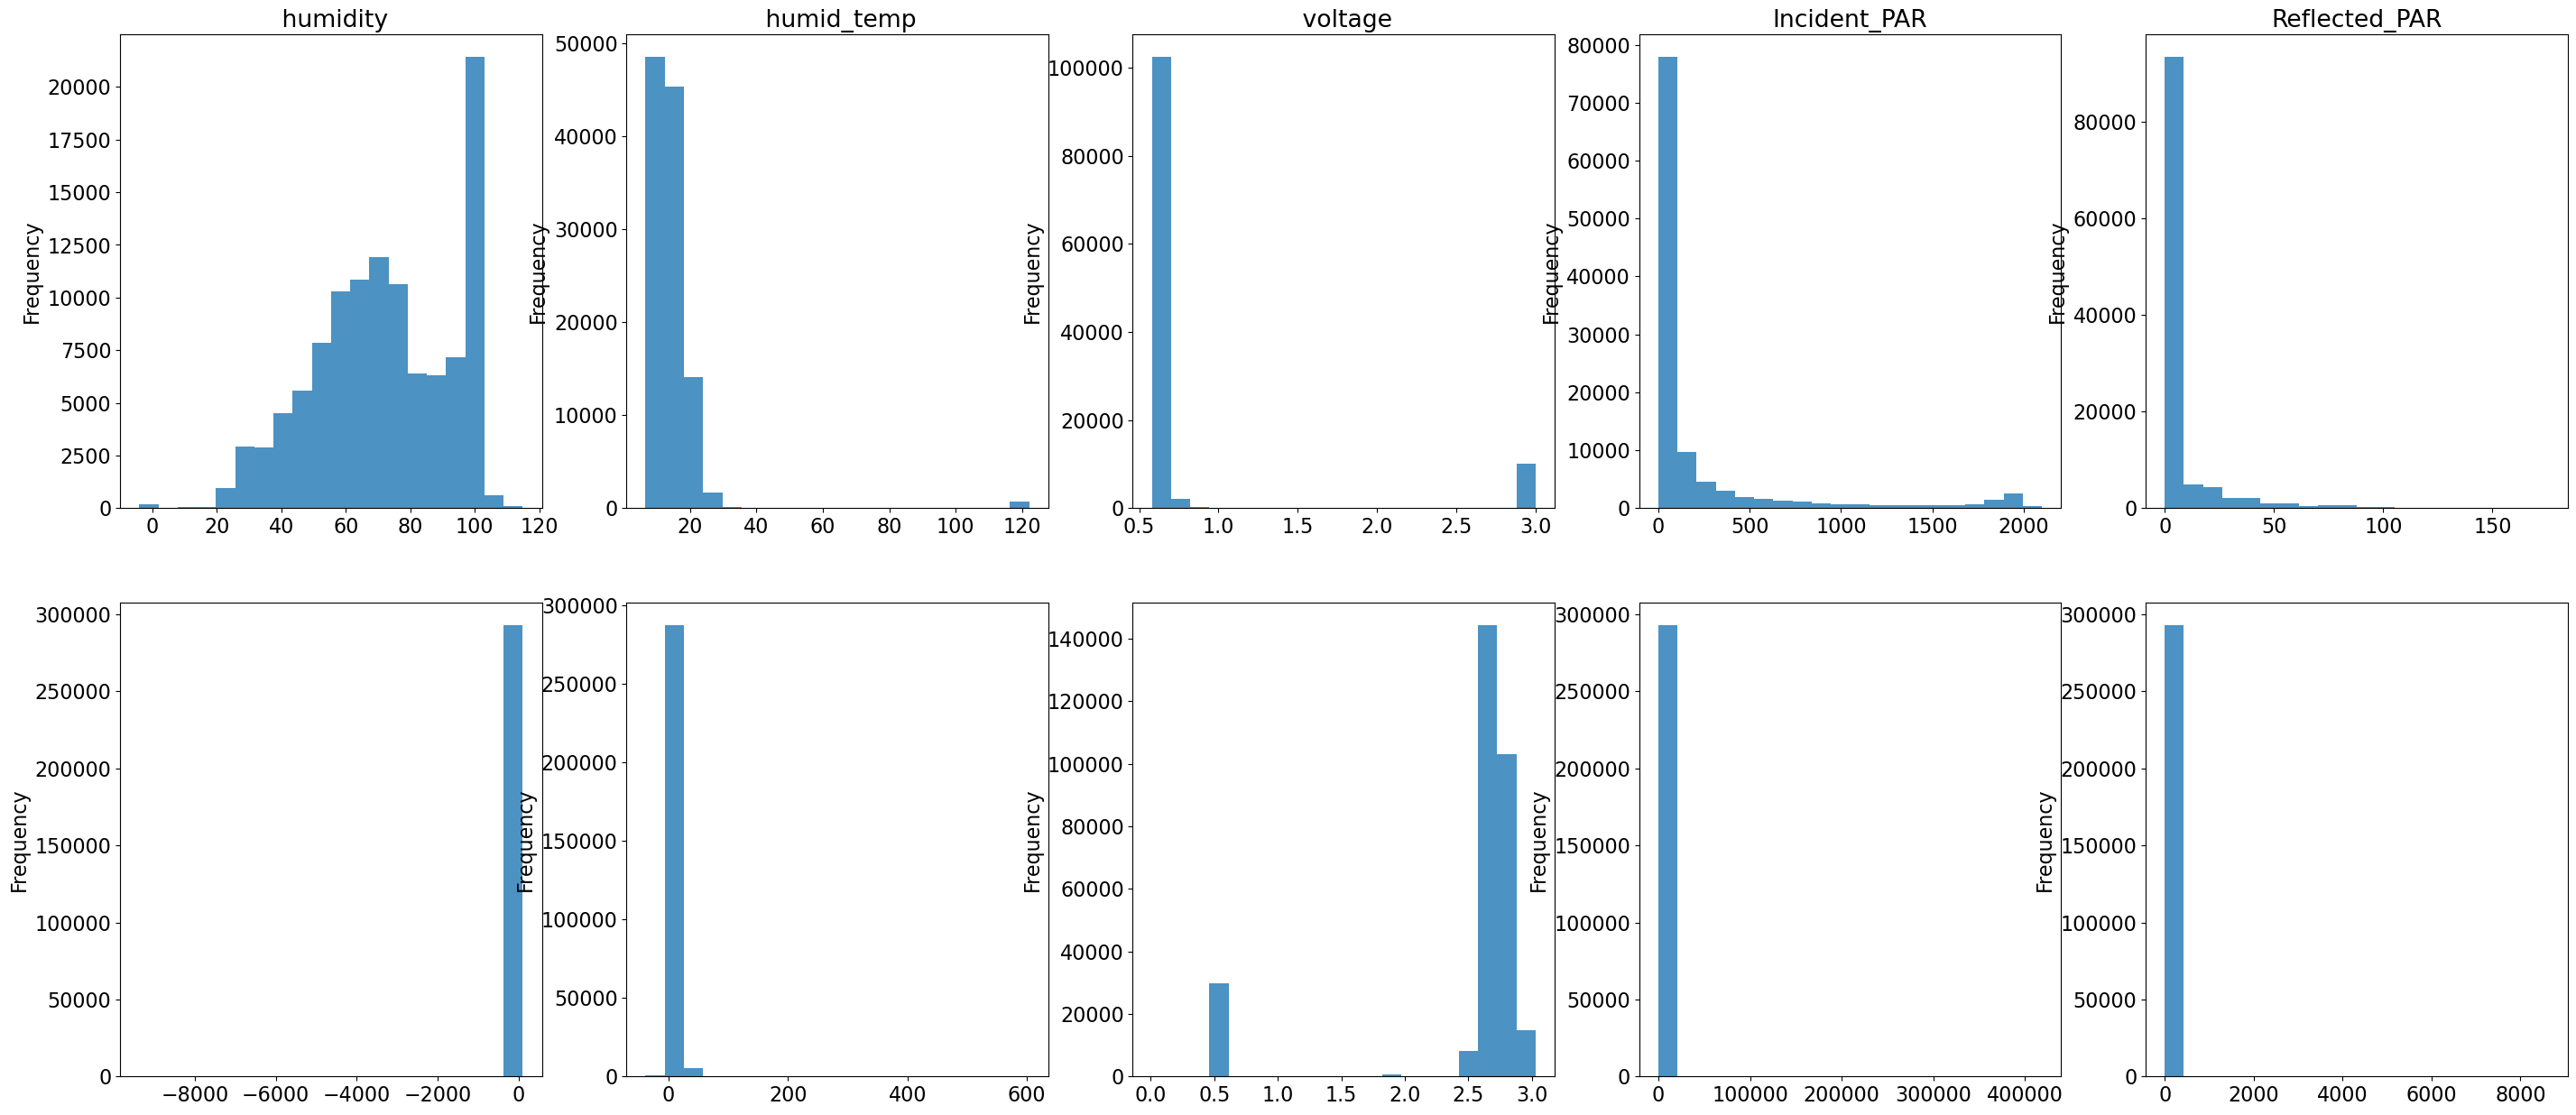

In [26]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
%matplotlib inline

variable_list = [' humidity',
                 ' humid_temp', ' voltage', 'Incident_PAR', 'Reflected_PAR']

fig, ax = plt.subplots(2,5, figsize=(35,15))
for i,var in enumerate(variable_list):
    
    sonoma_net[var].plot.hist(ax=ax[0,i], alpha=0.8, color='tab:blue',bins=20)
    sonoma_log[var].plot.hist(ax=ax[1,i], alpha=0.8, color='tab:blue',bins=20)
    ax[0,i].set_title(var)

In [22]:
sonoma_net[variable_list].describe().loc[['mean','std','25%','75%']].T

,mean,std,25%,75%
humidity,72.123596,21.327203,57.098400,92.607600
humid_temp,14.276954,9.840161,10.119800,16.088000
voltage,0.858631,0.666336,0.639296,0.665689
Incident_PAR,213.363966,462.274362,0.000000,156.228889
Reflected_PAR,5.036092,14.913059,0.000000,0.000000


In [25]:
sonoma_net[variable_list].median()

 humidity        72.054300
 humid_temp      12.981400
 voltage          0.653959
Incident_PAR      0.000000
Reflected_PAR     0.000000
dtype: float64

In [23]:
sonoma_log[variable_list].describe().loc[['mean','std','25%','75%']].T

,mean,std,25%,75%
humidity,61.414470,31.069201,40.02680,80.199700
humid_temp,15.022345,5.685116,10.86460,18.812400
voltage,2.506449,0.646910,2.62796,2.775330
Incident_PAR,201.302679,896.706333,0.00000,125.228333
Reflected_PAR,4.546960,21.858109,0.00000,0.000000


In [24]:
sonoma_log[variable_list].median()

 humidity        61.58290
 humid_temp      14.71600
 voltage          2.69964
Incident_PAR      0.00000
Reflected_PAR     0.00000
dtype: float64

We can see that the variables have a much better range now


## 3.b) Checking for missing data

In [190]:
missing_data_net[' nodeid'].value_counts()

122    4262
Name:  nodeid, dtype: int64

In [192]:
miss_data_log[' nodeid'].value_counts()

122    5309
15     1595
128    1366
Name:  nodeid, dtype: int64

In [26]:
import numpy as np
missing_data_net = sonoma_net[np.any(sonoma_net.isna(),1)]
print("No Missing Data from network data: ",len(missing_data_net))

miss_data_log = sonoma_log[np.any(sonoma_log.isna(),1)]
print("No Missing Data from log data: ",len(miss_data_log))

# Remove
sonoma_net_no_miss = sonoma_net[~np.any(sonoma_net.isna(),1)]
sonoma_log_no_miss = sonoma_log[~np.any(sonoma_log.isna(),1)]

print('\nNo. Network Data After Removing Missing: ', len(sonoma_net_no_miss))
print("No. Log Data After Removing Missing: ", len(sonoma_log_no_miss))

print('\nPct Missing Net: ', 100*len(missing_data_net)/len(sonoma_net))
print("Pct Missing Log: ", 100*len(miss_data_log)/len(sonoma_log))

No Missing Data from network data:  4262
No Missing Data from log data:  8270

No. Network Data After Removing Missing:  110718
No. Log Data After Removing Missing:  292786

Pct Missing Net:  3.706731605496608
Pct Missing Log:  2.7469972363945576


In [198]:
missing_data_net[' nodeid'].value_counts()

122    4262
Name:  nodeid, dtype: int64

In [199]:
miss_data_log[' nodeid'].value_counts()

122    5309
15     1595
128    1366
Name:  nodeid, dtype: int64

We note that majority of the missing data comes from node 122, and some missing are generated from 15 and 128.

# Part C 
- Add in location data from mote-location.txt

In [200]:
# Loads the information
mote_location = pd.read_csv('Data/mote-location-data.txt',sep='\t',skiprows=1,header=None)

# Loads the headers
mote_location_head = pd.read_csv('Data/mote-location-data.txt',sep='\t',header=0).columns

# Clean the headers
col_names_mote_location = [x for x in mote_location_head[0].split(' ') if x!='']

# Set the column names
mote_location.columns = col_names_mote_location
mote_location.head()

,ID,Height,Direc,Dist,Tree
0,24,10.5,WSW,0.1,edge
1,20,12.7,WSW,0.1,edge
2,27,14.9,WSW,0.1,edge
3,38,16.6,WSW,0.1,edge
4,0,16.9,NW,0.1,edge


In [201]:
print('Size mote-location table: ', len(mote_location))

Size mote-location table:  80


Checking if mote location is clean - ID should be a unique variable


In [29]:
np.all(mote_location['ID'].value_counts() == 1)

True

In [218]:
node_observed = set(list(sonoma_net[' nodeid'].unique()) + list(sonoma_log[' nodeid'].unique()))
node_in_mote = list(mote_location['ID'].unique())

unlisted_nodes = [x for x in node_observed if x not in node_in_mote]
listed_nodes = [x for x in node_observed if x in node_in_mote]

print("No Location data for Nodes: ", unlisted_nodes)

No Location data for Nodes:  [135, 65535, 100]


Merge tables together this is a left (main table) join  to the mote locations

In [30]:
sonoma_net = sonoma_net_no_miss.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

sonoma_log = sonoma_log_no_miss.merge(mote_location,
                how='left',
                left_on=' nodeid',
                right_on='ID')

# Part d) Finding Outliers

Firstly Combine Datasets

In [31]:
sonoma_net['source'] = 'net'
sonoma_log['source'] = 'log'
sonoma_all = pd.concat([sonoma_net, sonoma_log])

Plot Histogram Starting Point

In [32]:
variable_list

[' humidity', ' humid_temp', ' voltage', 'Incident_PAR', 'Reflected_PAR']

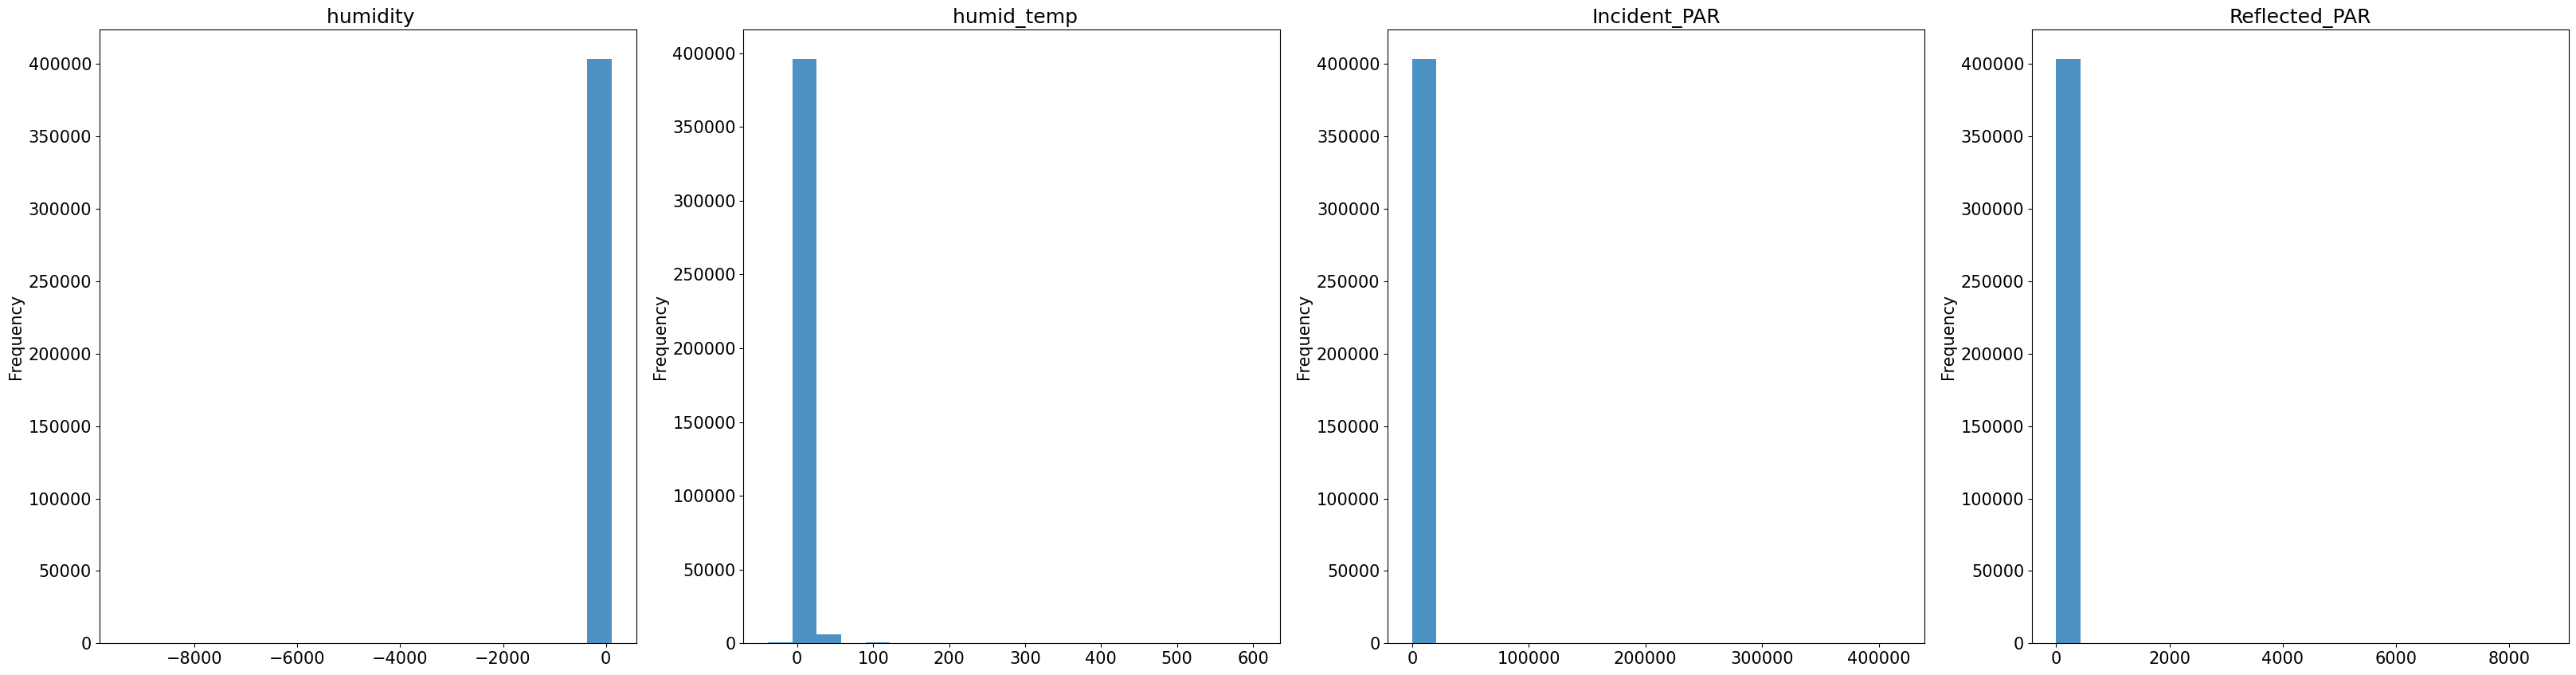

In [33]:
fig, ax = plt.subplots(1,4, figsize=(40,10))
variable_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
for i,var in enumerate(variable_list):

    sonoma_all[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)

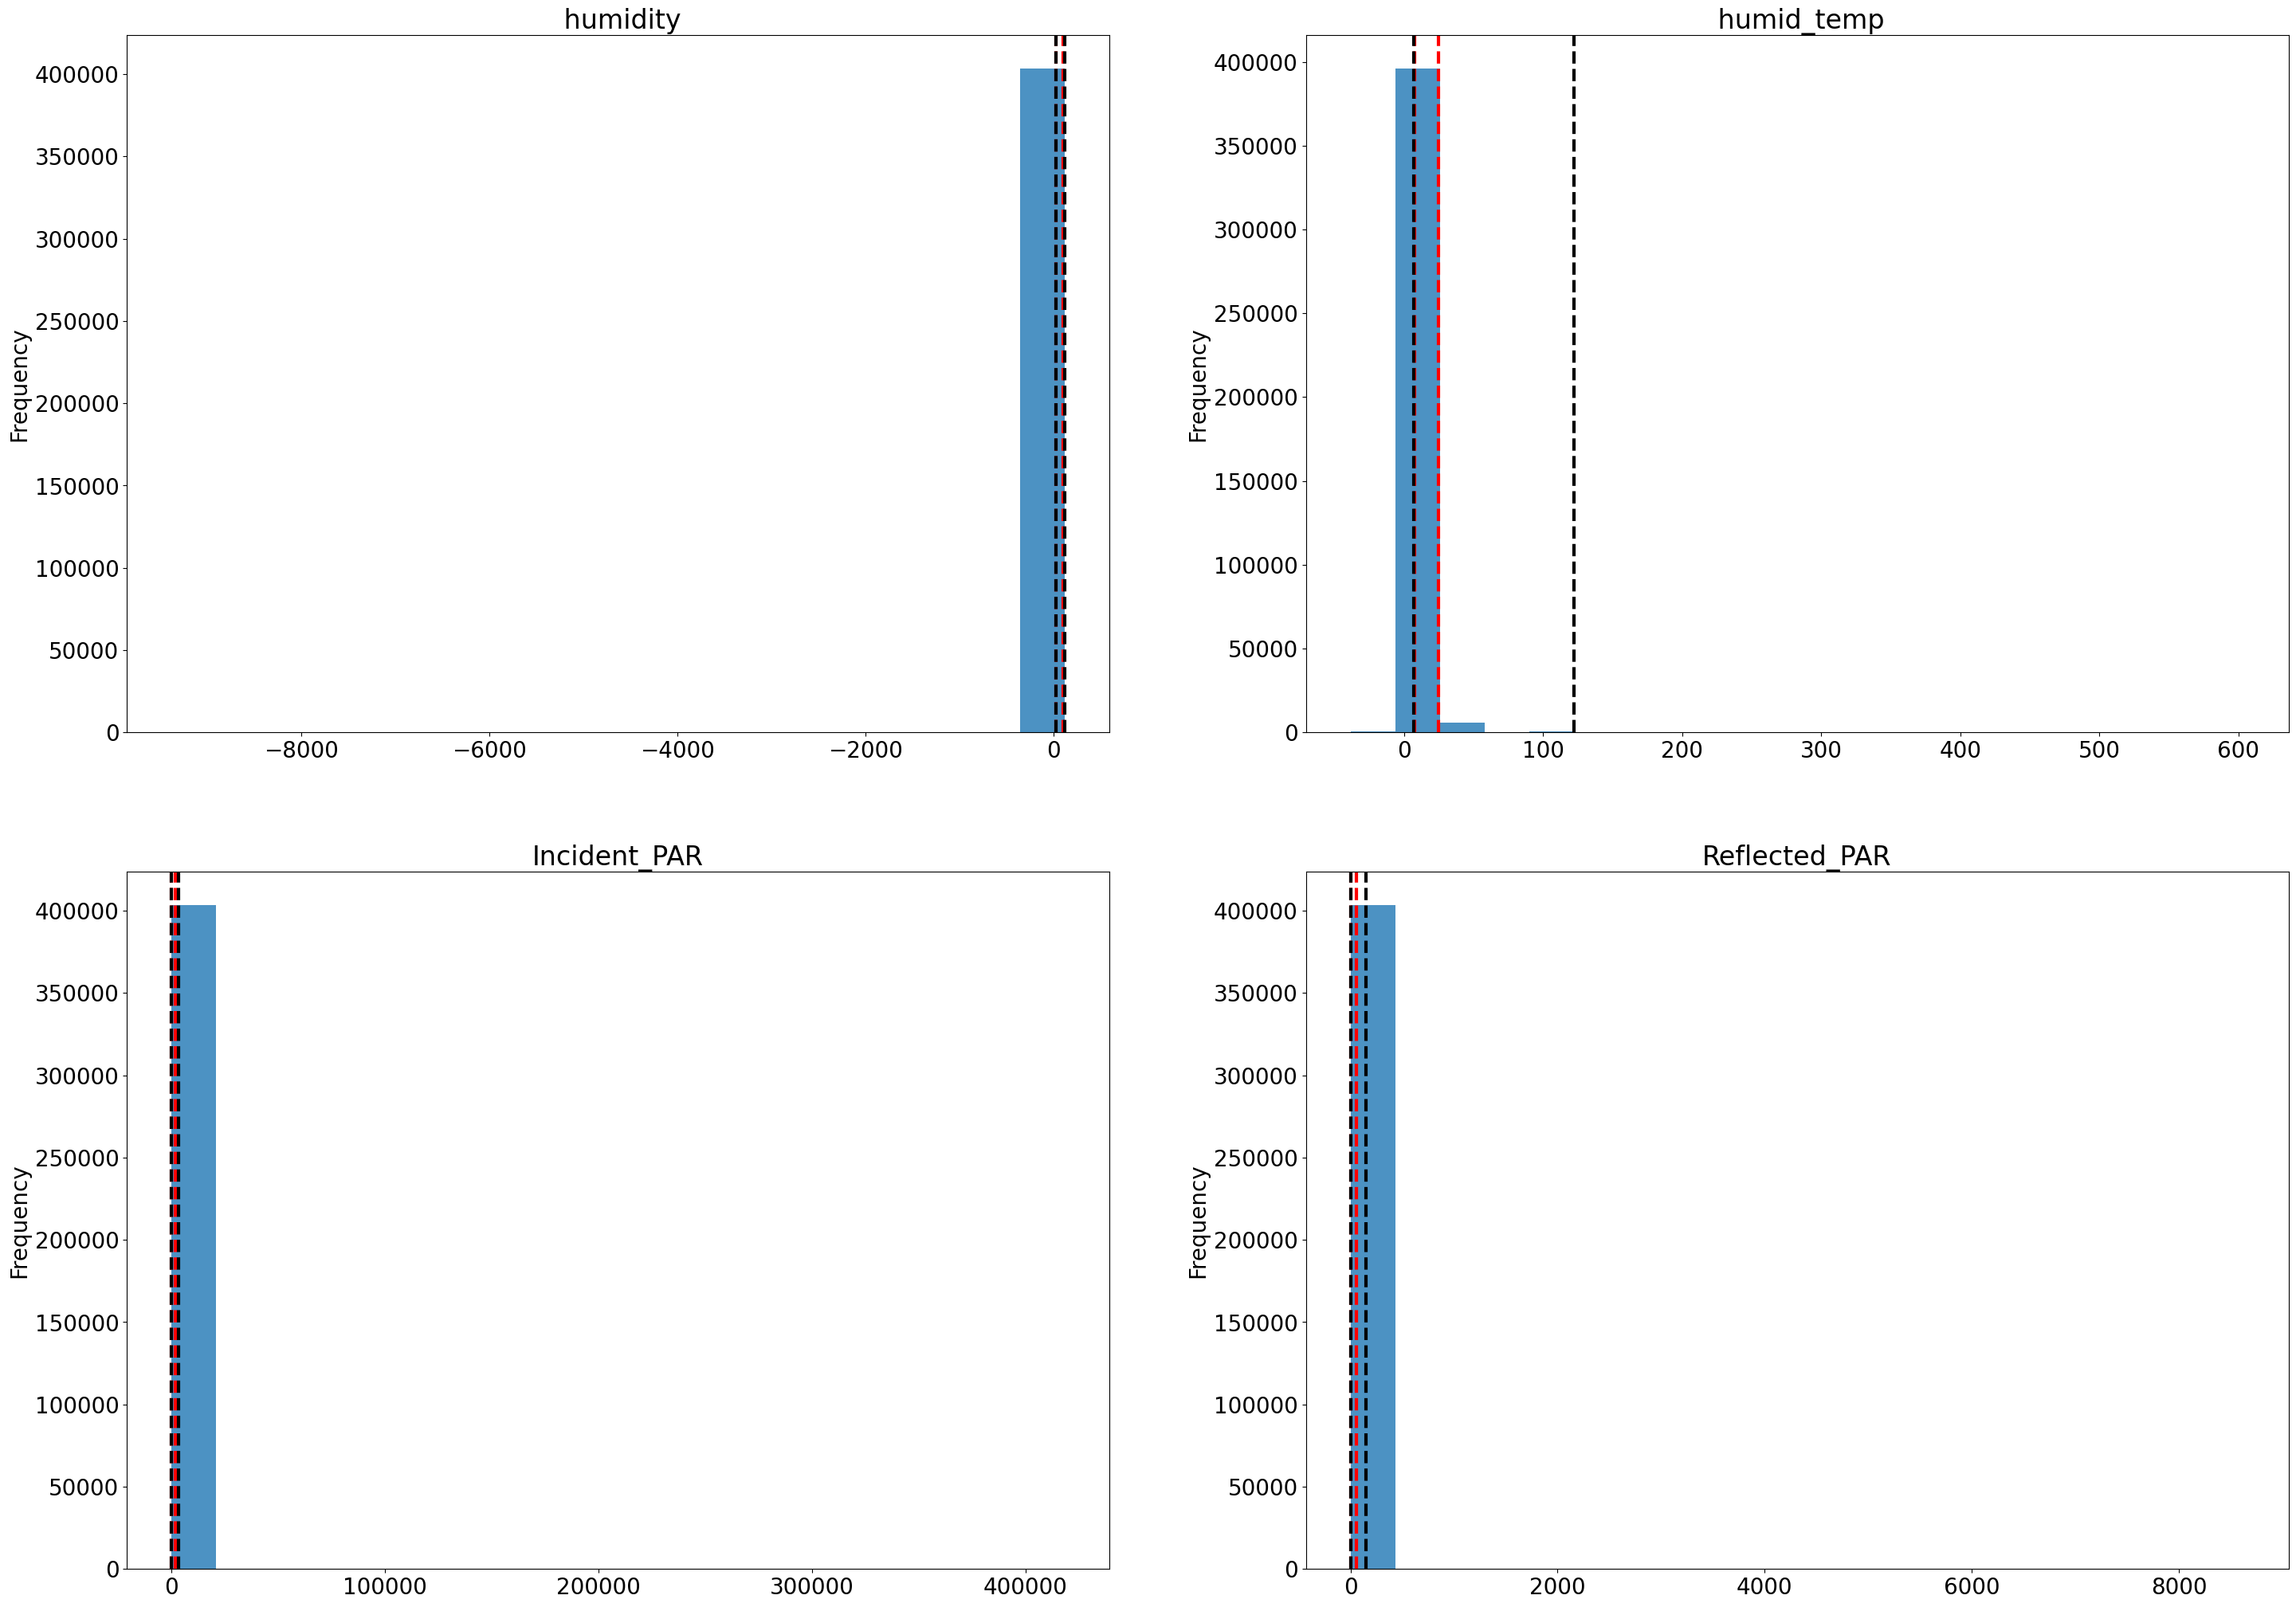

In [34]:
plt.rcParams.update({'font.size': 20})

var_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
plot_locs = [(0,0),(0,1),(1,0),(1,1)]
fig, ax = plt.subplots(2,2, figsize=(35,25))

# Choose Percentile values
percentiles = [(5,95), (25,75)]

for i,var in enumerate(var_list):
    
    sonoma_all[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all[var].values, q=2.5),np.percentile(sonoma_all[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all[var].values, q=0.5),np.percentile(sonoma_all[var].values, q=99.99)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

- It is clear that there are outliers for hamatop and hamabot
- Humidity has values that are negative which might not be possible as well (not sure)

In [35]:
# Hamatop/bot outliers
print('No, hamatop outliers: ', len(sonoma_all[sonoma_all['Incident_PAR']>2100]))
print('No, hamabot outliers: ', len(sonoma_all[sonoma_all['Reflected_PAR']>2000]))
# Humidity outliers
print('No. humidity outliers: ', len(sonoma_all[sonoma_all[' humidity']<5]))
print('No. Temperature outliers: ', len(sonoma_all[sonoma_all[' humid_temp']>80]))

outliers = sonoma_all[(sonoma_all['Incident_PAR']>110000) | \
                                               (sonoma_all['Reflected_PAR']>2000) | \
                                               (sonoma_all[' humidity']<5) | \
                                               (sonoma_all[' humid_temp']>80)]

print('No, combined outliers: ', len(outliers))

sonoma_all_no_outliers = sonoma_all[~((sonoma_all['Incident_PAR']>2100) | \
                                               (sonoma_all['Reflected_PAR']>2000) | \
                                               (sonoma_all[' humidity']<5) | \
                                               (sonoma_all[' humid_temp']>80))]

No, hamatop outliers:  421
No, hamabot outliers:  2
No. humidity outliers:  874
No. Temperature outliers:  746
No, combined outliers:  1407


### Replot after making changes

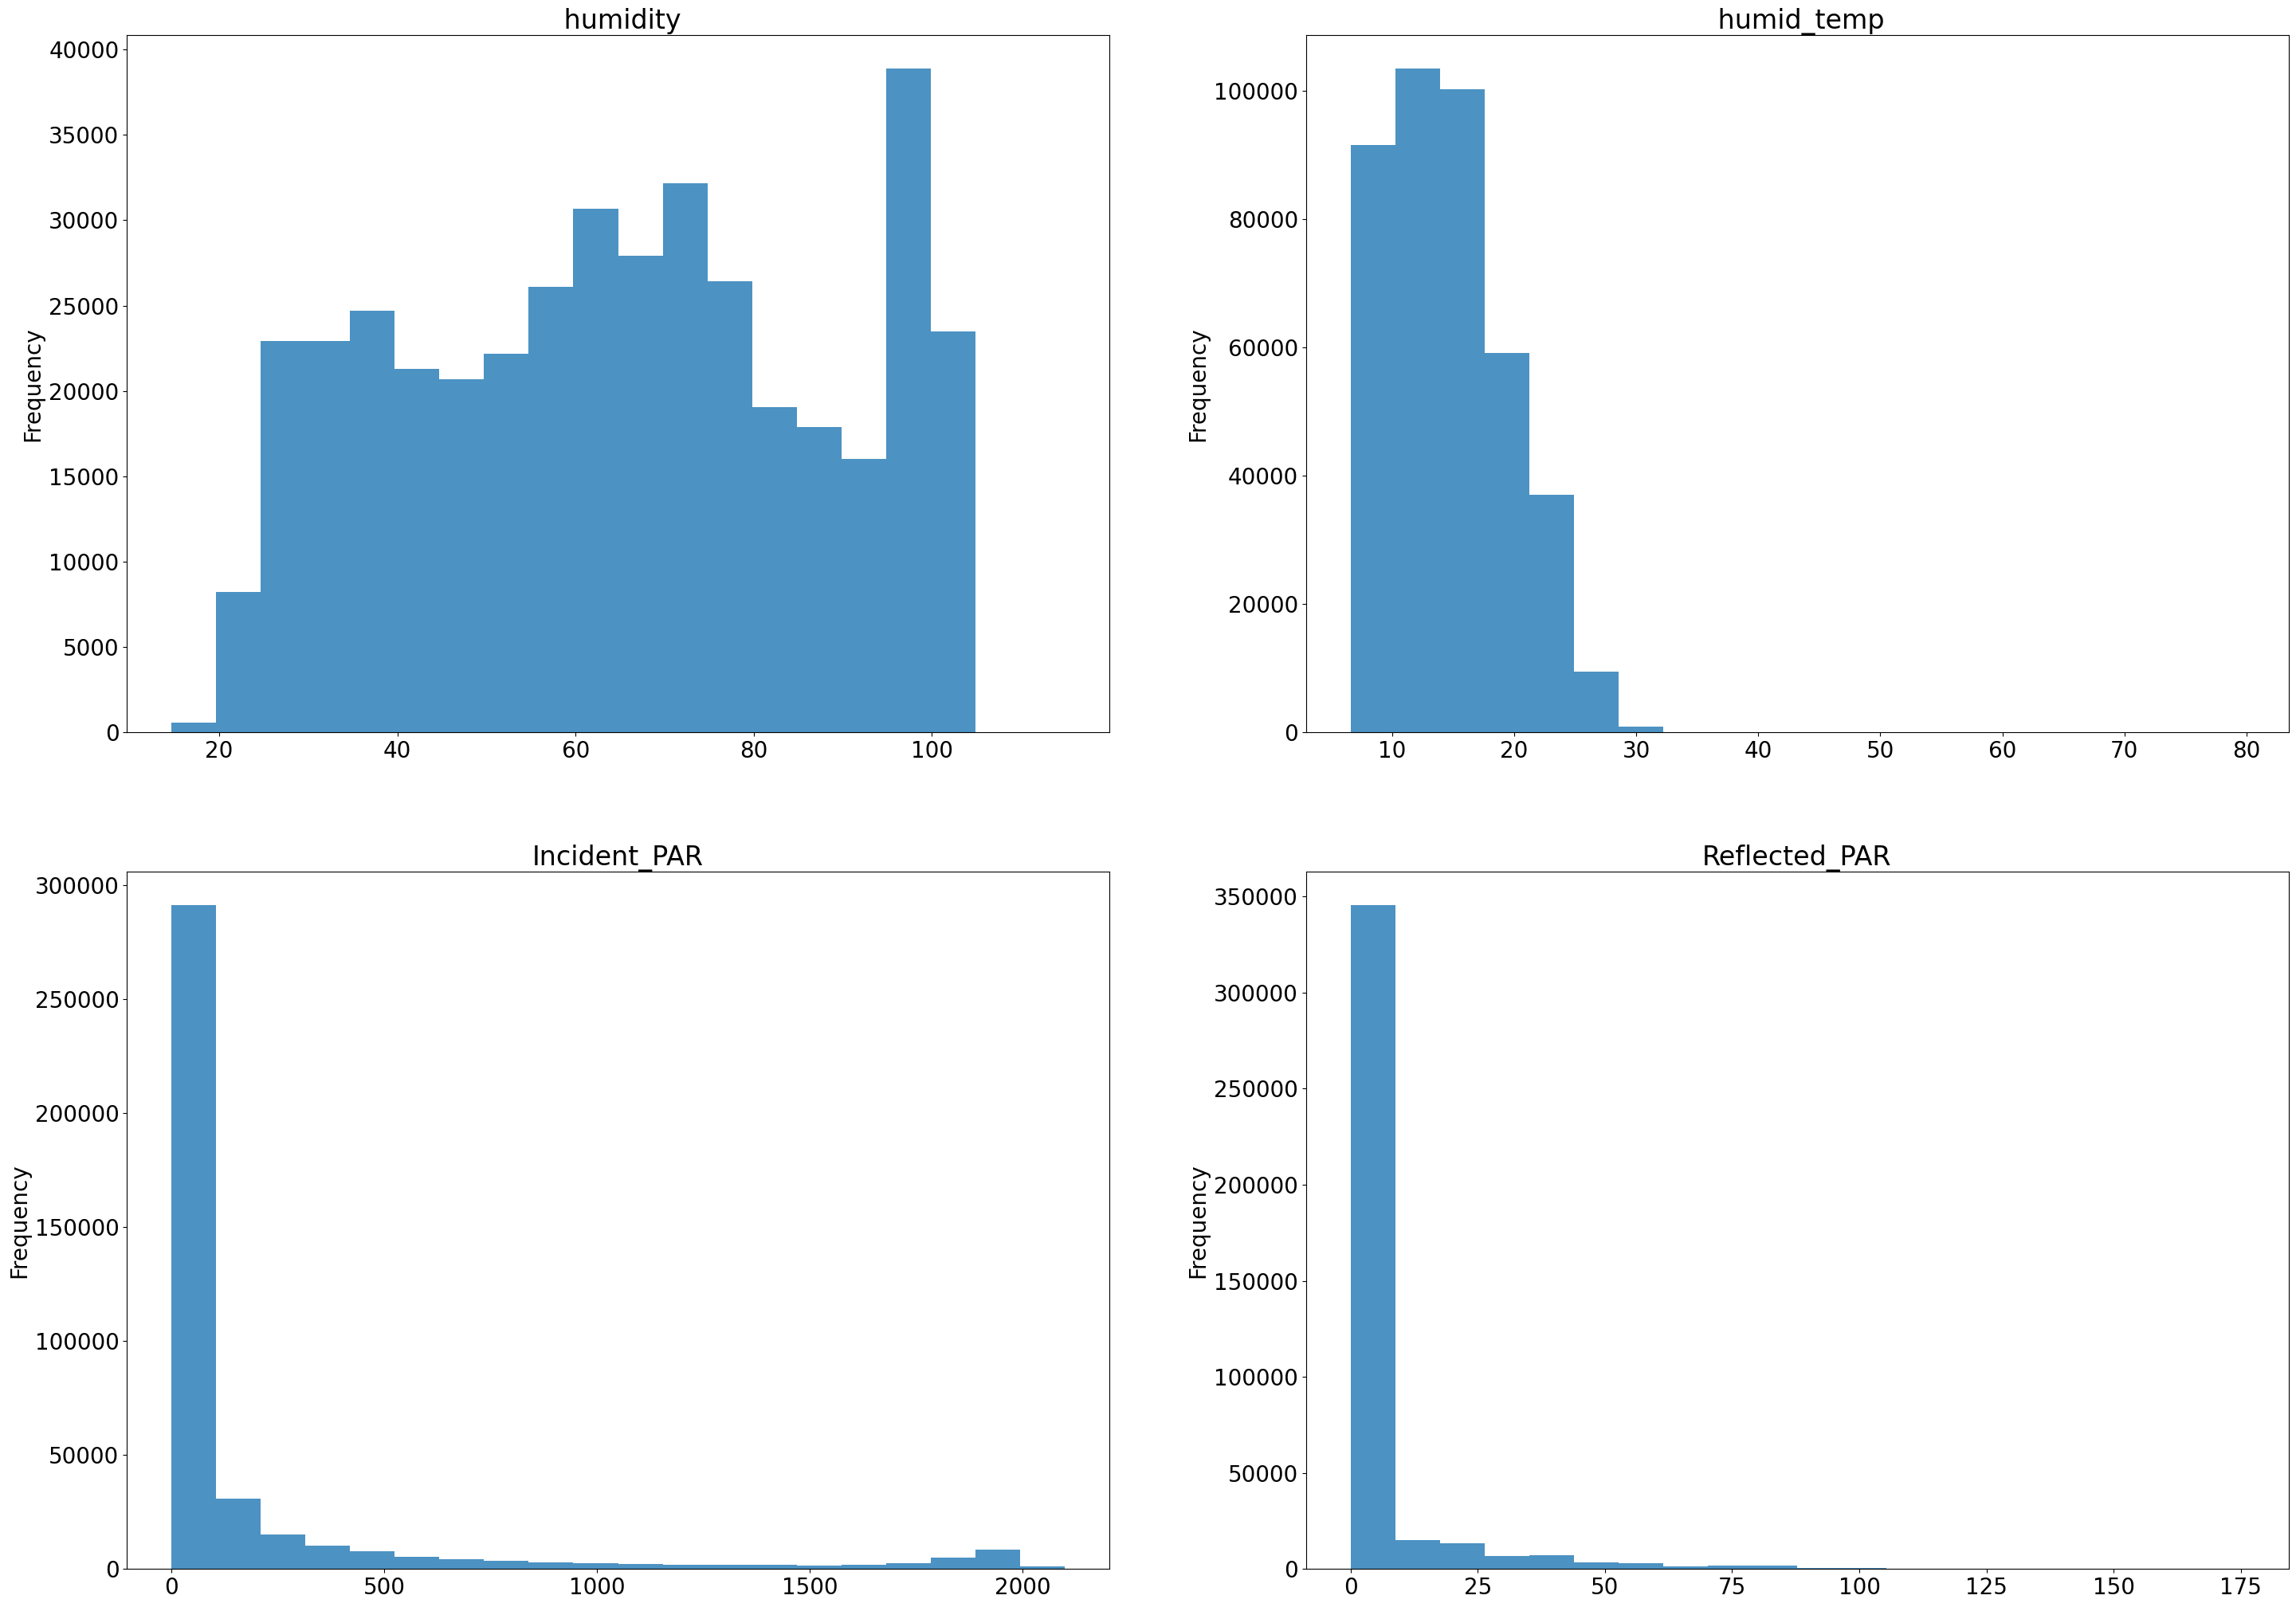

In [36]:
fig, ax = plt.subplots(2,2, figsize=(35,25))

for i,var in enumerate(var_list):
    
    sonoma_all_no_outliers[var].plot.hist(ax=ax[plot_locs[i][0],
                                    plot_locs[i][1]], alpha=0.8,
                              color='tab:blue',bins=20)

    ax[plot_locs[i][0],plot_locs[i][1]].set_title(var)
    
    # Get data percentiles 2.5-97.5 and 25-75
    c2_5,c97_5 = np.percentile(sonoma_all_no_outliers[var].values, q=2.5),np.percentile(sonoma_all_no_outliers[var].values, q=97.5)
    c01,c995 = np.percentile(sonoma_all_no_outliers[var].values, q=0.5),np.percentile(sonoma_all_no_outliers[var].values, q=99.5)
    
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c2_5, color='red',linestyle='--',alpha=1,linewidth=3)
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c97_5, color='red',linestyle='--',alpha=1,linewidth=3)
    
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c01, color='k',linestyle='--',alpha=1,linewidth=3)
    #ax[plot_locs[i][0],plot_locs[i][1]].axvline(c995, color='k',linestyle='--',alpha=1,linewidth=3)

plt.show()

In [37]:
plt.rcParams.update({'font.size': 24})

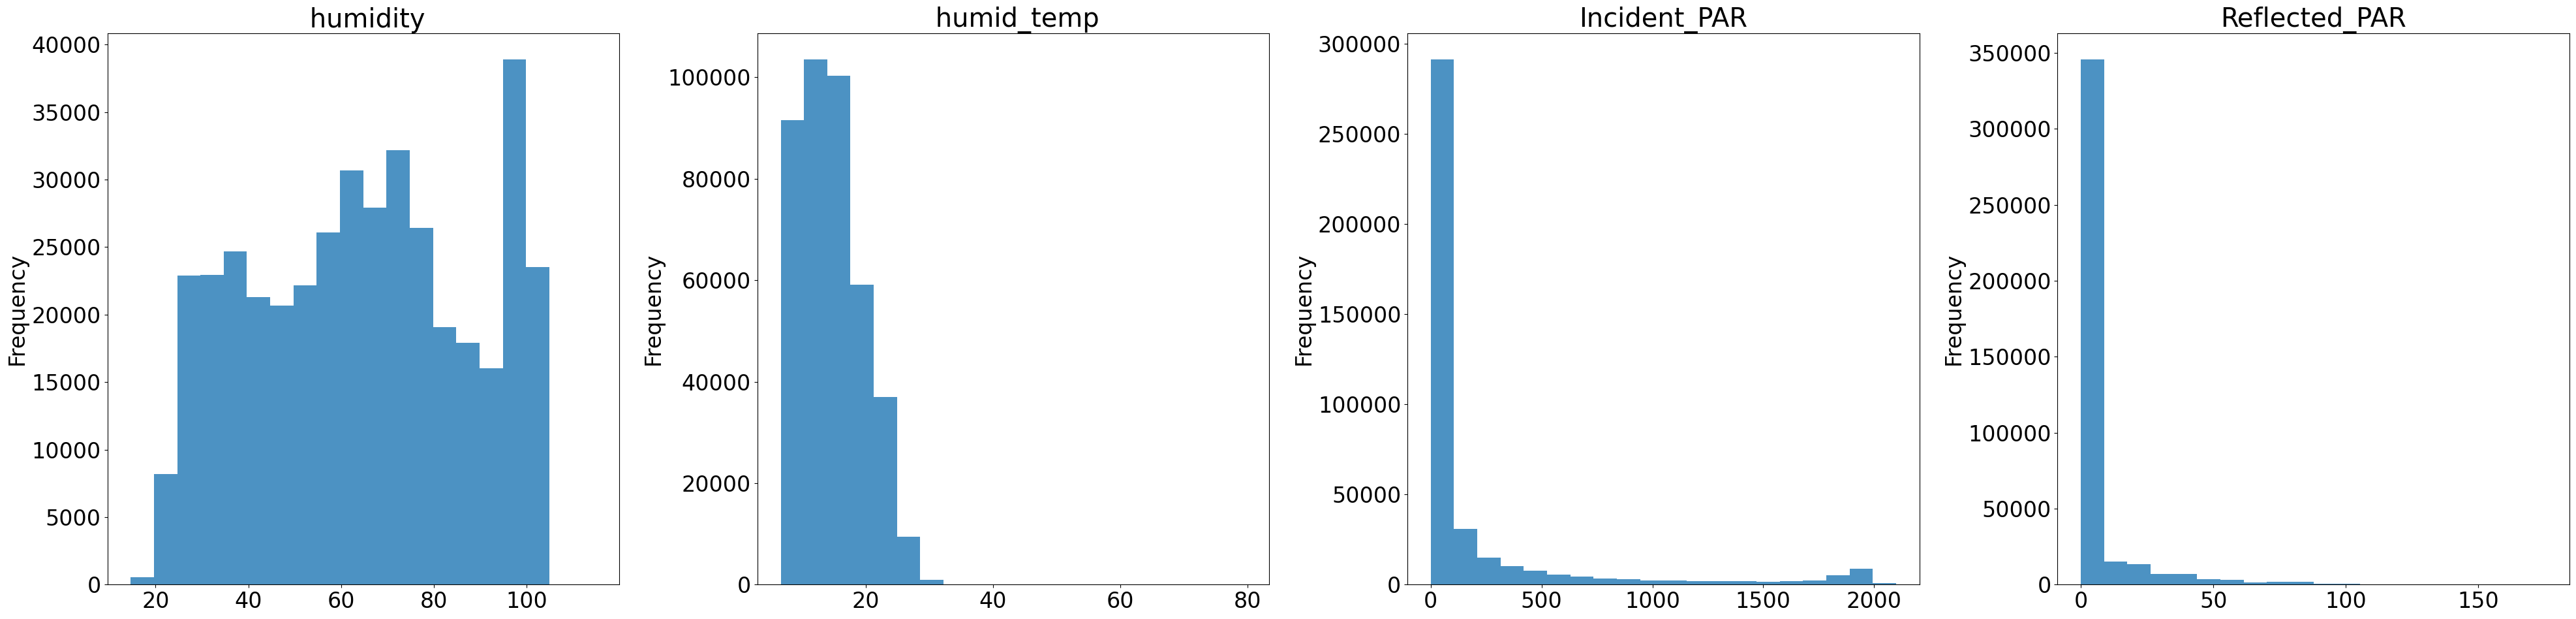

In [38]:
fig, ax = plt.subplots(1,4, figsize=(40,10))
variable_list = [' humidity', ' humid_temp', 'Incident_PAR', 'Reflected_PAR']
for i,var in enumerate(variable_list):

    sonoma_all_no_outliers[var].plot.hist(ax=ax[i], alpha=0.8, color='tab:blue',bins=20)
    ax[i].set_title(var)
plt.tight_layout()

In [39]:
sonoma_all_no_outliers.head()

,result_time,epoch,nodeid,parent,voltage,depth,humidity,humid_temp,humid_adj,hamatop,hamabot,Incident_PAR,Reflected_PAR,ID,Height,Direc,Dist,Tree,source
0,2004-05-07 18:24:58.666424,2812,119,5,0.645161,2,95.3567,12.6678,92.1444,4218.18,0.0,78.114444,0.0,119.0,55.2,WSW,3.0,interior,net
1,2004-05-07 18:24:58.805974,2812,105,129,0.653959,3,96.9957,12.6482,93.7072,9363.23,0.0,173.393148,0.0,105.0,62.9,SW,0.1,interior,net
2,2004-05-07 18:24:59.075427,2812,113,118,0.651026,4,94.5031,12.4522,91.2718,9405.41,0.0,174.174259,0.0,113.0,65.5,SW,0.1,interior,net
3,2004-05-07 18:24:59.355354,2812,138,5,0.653959,2,96.8828,12.6580,93.6018,9363.23,0.0,173.393148,0.0,138.0,57.8,WSW,0.1,interior,net
4,2004-05-07 18:24:59.675467,2812,127,42,0.651026,3,97.8044,12.3836,94.4090,4702.70,0.0,87.087037,0.0,127.0,60.1,SW,0.1,interior,net


In [40]:
print(len(sonoma_all_no_outliers))

402035


# Part e)
- Remove additional outliers corresponding to voltage (current can only do for log)
- Remove repeated data points which have same node id and same epoch
- There are still some extreme values for hamatop and hamabot as well as humid_temp. However they are not obviously errorneous, so we cannot tell if they are part of the distribution.

- Due to the sensitivity of the instrument, these points might be generated by miscalibration or equipment failure, and thus will not represent the data generated by the environment around the tree. This means that they will not be useful for analysis

### Removing Points with Voltage Outside Range

In [41]:
sonoma_all_no_outliers_no_voltage = sonoma_all_no_outliers[~(((sonoma_all_no_outliers[' voltage'] < 2.4) |\
                               (sonoma_all_no_outliers[' voltage'] > 3)) \
                       & (sonoma_all_no_outliers['source'] =='log'))]

In [42]:
print("No. Data Removed: ", len(sonoma_all_no_outliers) - len(sonoma_all_no_outliers_no_voltage))
print("No. Data after Removing Wrong Voltages: ", len(sonoma_all_no_outliers_no_voltage))


No. Data Removed:  28699
No. Data after Removing Wrong Voltages:  373336


### Check number of duplicates and remove

In [43]:
epoch_node_id_counts = sonoma_all_no_outliers_no_voltage.groupby([' epoch',
                                           ' nodeid']).size().reset_index().rename(columns={0:'count'}).\
                                            sort_values(by='count',ascending=False)

In [44]:
print("No Repeated Measurements: ",(epoch_node_id_counts['count']>1).sum())

No Repeated Measurements:  72720


In [45]:
sonoma_all_no_dupls = sonoma_all_no_outliers_no_voltage.groupby([' epoch', ' nodeid'], as_index=False).first()

In [48]:
print('No Data After Deduplication: ',len(sonoma_all_no_dupls))

No Data After Deduplication:  286647


# Only Take Nodes that are in Network

In [225]:
network_node_ids = sonoma_all_no_dupls[sonoma_all_no_dupls['source']=='net'][' nodeid'].unique()
sonoma_all_in_network = sonoma_all_no_dupls[sonoma_all_no_dupls[' nodeid'].isin(network_node_ids)]
print("No. Data after Removing Non Network Nodes: ", len(sonoma_all_in_network))

No. Data after Removing Non Network Nodes:  215139


# Only Take Nodes that we have location data for

In [227]:
sonoma_all_final = sonoma_all_in_network[sonoma_all_in_network[' nodeid'].isin(listed_nodes)]
print("No. Data after removining nodes with no location data: ", len(sonoma_all_final))

No. Data after removining nodes with no location data:  214859


# Add Time Information

In [229]:
sonoma_all_final = sonoma_all_final.merge(epoch_data, left_on=' epoch', right_on='Epoch_No',how='left')

In [230]:
sonoma_all_final.to_csv('data/sonoma_data_clean_v3.csv', index=False)